<a href="https://colab.research.google.com/github/tutosrive/ED/blob/from_colab/src/explanations/teacher/colab/Graph_Mar_Jue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creación del código para la construcción de un grafo no dirigido, considerando aristas y vértices mediante listas de adyacencias

In [ ]:

class Vertex:
    def __init__(self, id):
        self.id = id
        self.adjacent = {}

    def add_neighbor(self, neighbor, weight=0):
        self.adjacent[neighbor] = weight

    def get_connections(self):
        return self.adjacent

    def get_id(self):
        return self.id

In [ ]:
class Graph:
    def __init__(self):
        self.vertex_list = {}
        self.num_vertex = 0

    def add_vertex(self, id):
        self.num_vertex += 1
        new_vertex = Vertex(id)
        self.vertex_list[id] = new_vertex
        return new_vertex

    def get_vertex(self, id):
        return self.vertex_list.get(id)

    def add_edge(self, from_id, to_id, weight=0):
        if from_id not in self.vertex_list:
            self.add_vertex(from_id)
        if to_id not in self.vertex_list:
            self.add_vertex(to_id)
        self.vertex_list[from_id].add_neighbor(to_id, weight)

    def get_vertices(self):
        return self.vertex_list.keys()



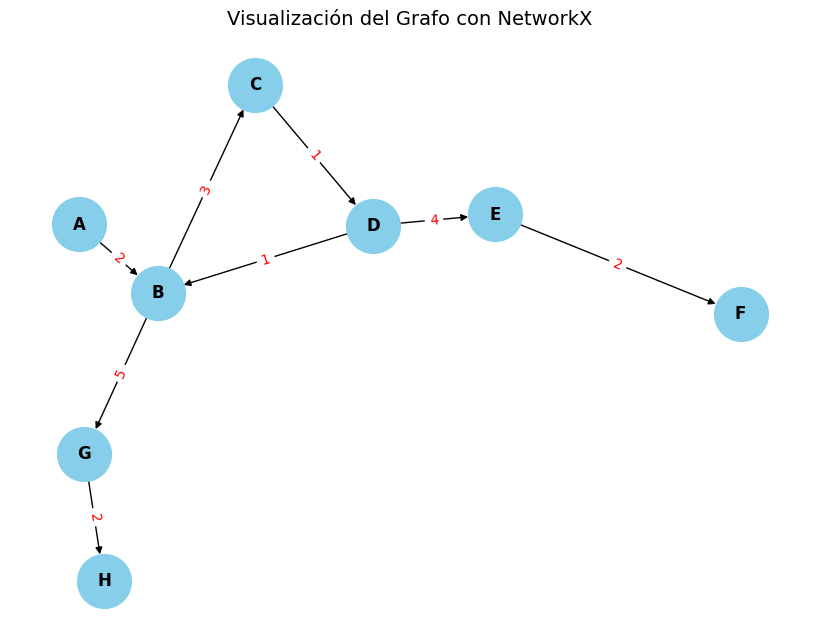

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
# === Crear y poblar el grafo ===

g = Graph()
g.add_edge('A', 'B', 2)
g.add_edge('B', 'C', 3)
g.add_edge('C', 'D', 1)
g.add_edge('D', 'E', 4)
g.add_edge('E', 'F', 2)
g.add_edge('B', 'G', 5)
g.add_edge('G', 'H', 2)
g.add_edge('D', 'B', 1)  # Ejemplo de arista hacia atrás

# === Convertir a networkx para visualizar ===

G_nx = nx.DiGraph()  # Usa DiGraph para grafo dirigido (puedes usar nx.Graph() si no lo es)

for v_id, vertex in g.vertex_list.items():
    for neighbor, weight in vertex.get_connections().items():
        G_nx.add_edge(v_id, neighbor, weight=weight)

# === Dibujar el grafo ===

pos = nx.spring_layout(G_nx, seed=42)
edge_labels = nx.get_edge_attributes(G_nx, 'weight')

plt.figure(figsize=(8, 6))
nx.draw(G_nx, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(G_nx, pos, edge_labels=edge_labels, font_color='red')
plt.title("Visualización del Grafo con NetworkX", fontsize=14)
plt.show()